# ROSSBY SOLITON

<p>
A barotropic equatorial soliton is initialized within the domain, then propagates out. The total energy of the domain is checked with hopes of very few waves remaining at the end of the run.
</p>


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

In [3]:
geom=nc.Dataset('ocean_geometry.nc')

In [4]:
x=geom.variables['lonq']
y=geom.variables['latq']
xc=geom.variables['lonh']
yc=geom.variables['lath']
wet=geom.variables['wet']

In [5]:
#Return the total energy
def readError(f):
    # East first two lines
    f.readline()
    f.readline()
     
    ttime = []
    energy = []
    msl = []
    mass = []
    for line in f:
        a, b, c, d, e, f, g, h = re.split(',\s+', line)
        ttime.append(float(b))
        # Eat the "En "
        d = d[3:]
        energy.append(float(d))
        f = f[3:]
        msl.append(float(f))
        g = g[5:]
        mass.append(float(g))
    ttime = np.array(ttime)
    energy = np.array(energy)
    msl = np.array(msl)
    mass = np.array(mass)
    return energy[-1]*1.e4

In [22]:
Fam='4'
ERR=np.zeros(16).reshape((4,4))

In [23]:
for j in np.arange(4):
    for i in np.arange(4):
        path=Fam+'.'+str(i)+'.'+str(j)
        try:
            f=open(path+'/ocean.stats.gnu', 'r')
            res=readError(f)
        except:
            res=-999.
        ERR[i,j]=res
        f.close()

In [24]:
ERR=np.ma.masked_where(ERR==-999.,ERR)
sk=1.0-ERR
sk[sk<0.]=0.

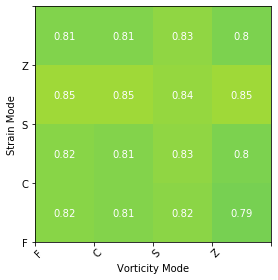

In [25]:
fig,ax = plt.subplots()
img=ax.imshow(sk.T,origin='lower',vmin=0.0,vmax=1.0,cmap=plt.cm.viridis)
ax.set_xticks(np.arange(-.5,4.5))
ax.set_yticks(np.arange(-.5,4.5))
ax.set_xticklabels(['F','C','S','Z'])
ax.set_yticklabels(['F','C','S','Z'])
for j in np.arange(4):
    for i in np.arange(4):
        if ERR[i,j]:
            ax.text(i,j,str(int(sk[i,j]*1e2)*1.e-2)[:4],ha="center",va="center",color="w")
plt.setp(ax.get_xticklabels(), rotation=45, ha="center",
         rotation_mode="anchor")
ax.set_xlabel('Vorticity Mode')
ax.set_ylabel('Strain Mode')
#plt.colorbar(img)
fig.tight_layout()
plt.savefig('score.Fam.'+str(Fam)+'.png')

In [24]:
path

'3.1.0'